# Pima Indians Diabetes Data Set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv("./data/diabetes.csv")
print(df.head())
cols = df.columns.values
x_cols = cols[:-1]

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1       85             66             29        0  26.6   
1            1       89             66             23       94  28.1   
2            5      116             74              0        0  25.6   
3           10      115              0              0        0  35.3   
4            4      110             92              0        0  37.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.351   31        0  
1                     0.167   21        0  
2                     0.201   30        0  
3                     0.134   29        0  
4                     0.191   30        0  


In [3]:
df = df[df['Insulin'] != 0]
df = df[df['SkinThickness'] != 0]
df = df[df['BloodPressure'] != 0]
df = df[df['Glucose'] != 0]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,89,66,23,94,28.1,0.167,21,0
6,1,103,30,38,83,43.3,0.183,33,0
7,3,126,88,41,235,39.3,0.704,27,0
9,1,97,66,15,140,23.2,0.487,22,0
10,13,145,82,19,110,22.2,0.245,57,0


### First lets segregate the outcomes

In [4]:
df_diabetes = df[df['Outcome'] == 1]
df_nondiabetes = df[df['Outcome'] == 0]

### Lets plot!

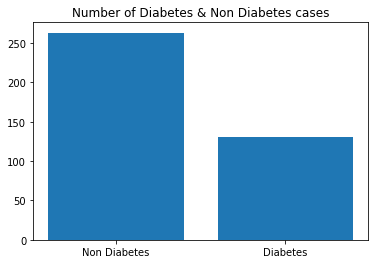

In [5]:
objects = ('Non Diabetes', 'Diabetes')

plt.bar(range(len(objects)), df['Outcome'].value_counts(), align="center")
plt.xticks(range(len(objects)), objects)
plt.title("Number of Diabetes & Non Diabetes cases")
plt.show()

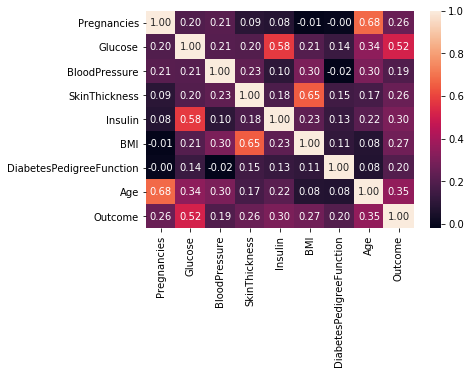

In [6]:
sb.heatmap(df.corr(), annot=True, fmt='.2f')

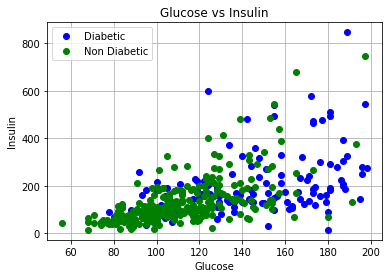

In [7]:
plt.plot(df_diabetes['Glucose'], df_diabetes['Insulin'], linestyle="None", marker='o', color='b')
plt.plot(df_nondiabetes['Glucose'], df_nondiabetes['Insulin'], linestyle="None", marker='o', color='g')
plt.grid()
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.title("Glucose vs Insulin")
plt.legend(("Diabetic", "Non Diabetic"))

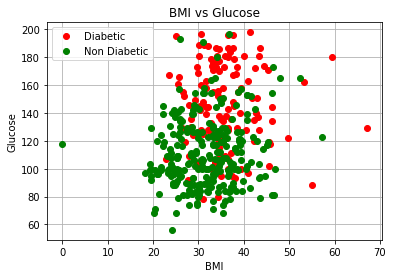

In [8]:
plt.plot(df_diabetes['BMI'], df_diabetes['Glucose'], linestyle="None", marker='o', color='r')
plt.plot(df_nondiabetes['BMI'], df_nondiabetes['Glucose'], linestyle="None", marker='o', color='g')
plt.grid()
plt.xlabel("BMI")
plt.ylabel("Glucose")
plt.title("BMI vs Glucose")
plt.legend(("Diabetic", "Non Diabetic"))

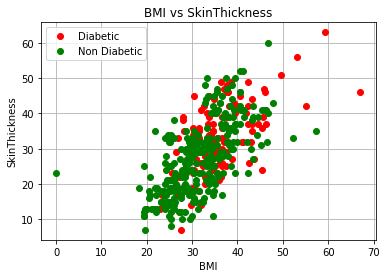

In [9]:
plt.plot(df_diabetes['BMI'], df_diabetes['SkinThickness'], linestyle="None", marker='o', color='r')
plt.plot(df_nondiabetes['BMI'], df_nondiabetes['SkinThickness'], linestyle="None", marker='o', color='g')
plt.grid()
plt.xlabel("BMI")
plt.ylabel("SkinThickness")
plt.title("BMI vs SkinThickness")
plt.legend(("Diabetic", "Non Diabetic"))

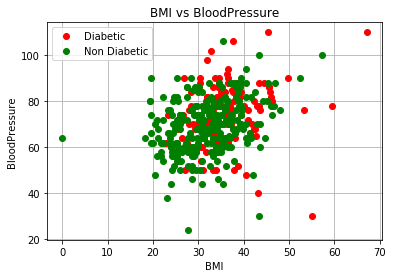

In [10]:
plt.plot(df_diabetes['BMI'], df_diabetes['BloodPressure'], linestyle="None", marker='o', color='r')
plt.plot(df_nondiabetes['BMI'], df_nondiabetes['BloodPressure'], linestyle="None", marker='o', color='g')
plt.grid()
plt.xlabel("BMI")
plt.ylabel("BloodPressure")
plt.title("BMI vs BloodPressure")
plt.legend(("Diabetic", "Non Diabetic"))

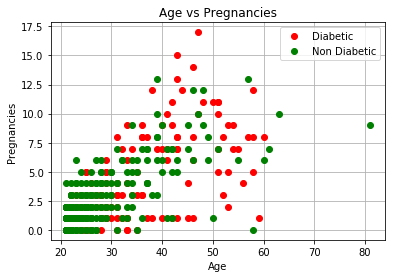

In [11]:
plt.plot(df_diabetes['Age'], df_diabetes['Pregnancies'], linestyle="None", marker='o', color='r')
plt.plot(df_nondiabetes['Age'], df_nondiabetes['Pregnancies'], linestyle="None", marker='o', color='g')
plt.grid()
plt.xlabel("Age")
plt.ylabel("Pregnancies")
plt.title("Age vs Pregnancies")
plt.legend(("Diabetic", "Non Diabetic"))

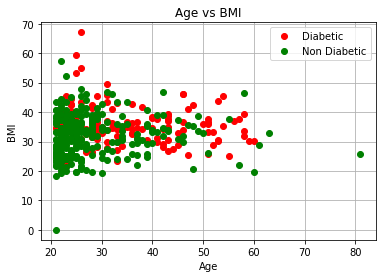

In [12]:
plt.plot(df_diabetes['Age'], df_diabetes['BMI'], linestyle="None", marker='o', color='r')
plt.plot(df_nondiabetes['Age'], df_nondiabetes['BMI'], linestyle="None", marker='o', color='g')
plt.grid()
plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("Age vs BMI")
plt.legend(("Diabetic", "Non Diabetic"))

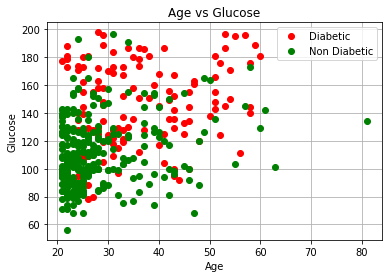

In [13]:
plt.plot(df_diabetes['Age'], df_diabetes['Glucose'], linestyle="None", marker='o', color='r')
plt.plot(df_nondiabetes['Age'], df_nondiabetes['Glucose'], linestyle="None", marker='o', color='g')
plt.grid()
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.title("Age vs Glucose")
plt.legend(("Diabetic", "Non Diabetic"))

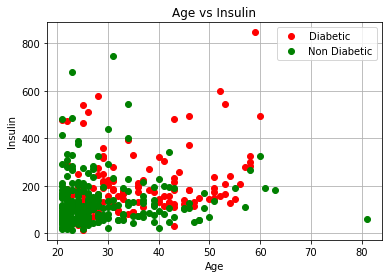

In [14]:
plt.plot(df_diabetes['Age'], df_diabetes['Insulin'], linestyle="None", marker='o', color='r')
plt.plot(df_nondiabetes['Age'], df_nondiabetes['Insulin'], linestyle="None", marker='o', color='g')
plt.grid()
plt.xlabel("Age")
plt.ylabel("Insulin")
plt.title("Age vs Insulin")
plt.legend(("Diabetic", "Non Diabetic"))

## Which features provide you with a seemingly good split? 

## Split your train test data properly!

## Which features will you use to predict the outcome? Do you need all?

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics 

## Trying with all features and checking metrics

In [16]:
classifer = SVC(kernel='linear')
X_train, X_test, y_train, y_test = train_test_split(df[x_cols], df['Outcome'], test_size=0.2, random_state=12)

y_test.value_counts()

0    45
1    34
Name: Outcome, dtype: int64

In [17]:
model = classifer.fit(X_train, y_train)
obtained_y = model.predict(X_test)
metrics.confusion_matrix(y_test, obtained_y)

array([[44,  1],
       [19, 15]], dtype=int64)

In [18]:
print(metrics.classification_report(y_test, obtained_y))

             precision    recall  f1-score   support

          0       0.70      0.98      0.81        45
          1       0.94      0.44      0.60        34

avg / total       0.80      0.75      0.72        79



## Not so bad, can it be improved?

In [25]:
x_cols = ['Age', "Glucose"]
df_new = df[x_cols]
df_new.head()

,Age,Glucose
1,21,89
6,33,103
7,27,126
9,22,97
10,57,145


In [26]:
classifer_new = SVC(kernel='linear')
print(classifer_new)
X_train, X_test, y_train, y_test = train_test_split(df[x_cols], df['Outcome'], test_size=0.2, random_state=9875)
y_train.value_counts()

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


0    207
1    107
Name: Outcome, dtype: int64

In [31]:
model = classifer_new.fit(X_train, y_train)
obtained_y = model.predict(X_test)
print(y_test.value_counts())
metrics.confusion_matrix(y_test, obtained_y)

0    56
1    23
Name: Outcome, dtype: int64


array([[53,  3],
       [10, 13]], dtype=int64)

In [28]:
print(metrics.classification_report(y_test, obtained_y))

             precision    recall  f1-score   support

          0       0.84      0.95      0.89        56
          1       0.81      0.57      0.67        23

avg / total       0.83      0.84      0.83        79



## plot the SVM hyperplane for 2 most important features

20 82 55 199


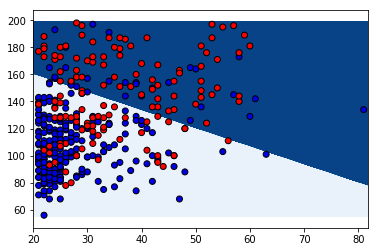

In [29]:
import numpy as np
x_min, x_max = df_new.iloc[:, 0].min() - 1, df_new.iloc[:, 0].max() + 1
y_min, y_max = df_new.iloc[:, 1].min() - 1, df_new.iloc[:, 1].max() + 1
print(x_min, x_max, y_min, y_max)
xx, yy = np.meshgrid(np.arange(x_min, x_max, .2),
                     np.arange(y_min, y_max, .2))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

color_map = {-1: (1, 1, 1), 0: (0, 0, .9), 1: (1, 0, 0), 2: (.8, .6, 0)}
colors = [color_map[y1] for y1 in df['Outcome']]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues)

plt.scatter(df_new.iloc[:, 0],df_new.iloc[:, 1], c=colors, edgecolors='black')